In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
titanic_data = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataset
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
# Check for missing values
print(titanic_data.isnull().sum())

# Fill missing 'Age' values with the median age
if 'Age' in titanic_data.columns:
    titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Fill missing 'Embarked' values with the mode
if 'Embarked' in titanic_data.columns:
    titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

# Drop 'Cabin', 'Ticket', and 'Name' columns if they exist
for col in ['Cabin', 'Ticket', 'Name']:
    if col in titanic_data.columns:
        titanic_data.drop(col, axis=1, inplace=True)

# Encode categorical features
if 'Sex' in titanic_data.columns:
    label_encoder = LabelEncoder()
    titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])

if 'Embarked' in titanic_data.columns:
    titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Feature Engineering: create a new feature 'FamilySize'
if 'SibSp' in titanic_data.columns and 'Parch' in titanic_data.columns:
    titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
    titanic_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Drop PassengerID for training purposes if it exists
if 'PassengerId' in titanic_data.columns:
    titanic_data.drop(['PassengerId'], axis=1, inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
# Define features (X) and target (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

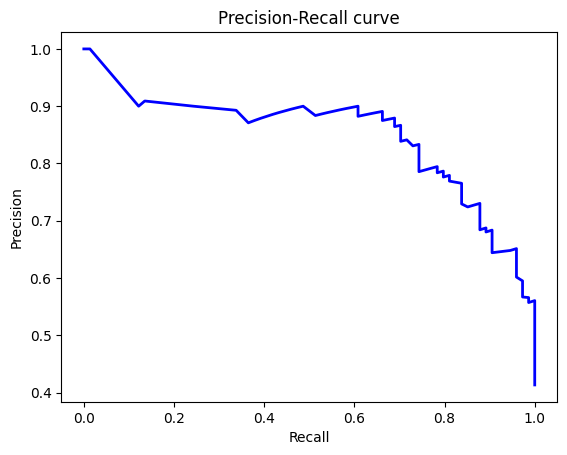

In [16]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


In [18]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.2f}")


Cross-validation scores: [0.78321678 0.76223776 0.78873239 0.75352113 0.85211268]
Average cross-validation score: 0.79


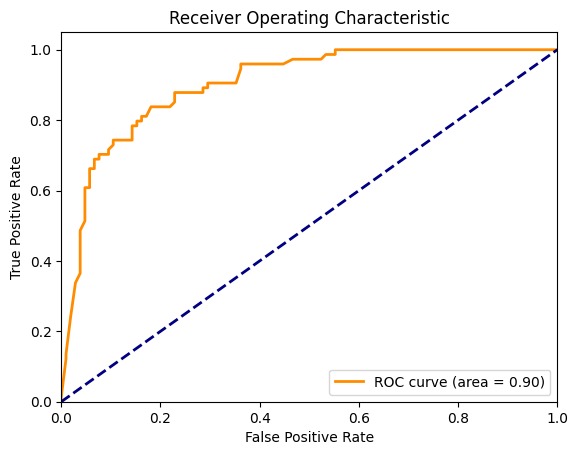

In [22]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



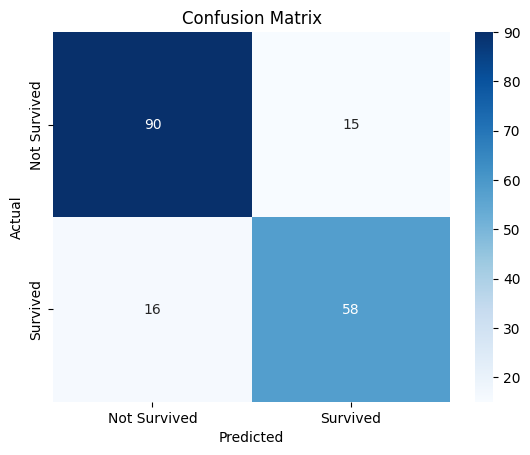

In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
